In [1]:
import plotly.express as px
import numpy as np 
import pandas as pd
import seaborn as sns

import folium

from bokeh.models import *
from bokeh.plotting import *
from bokeh.io import *
from bokeh.tile_providers import *
from bokeh.palettes import *
from bokeh.transform import *
from bokeh.layouts import *

# from bokeh import models, plotting, io, tile_providers, palettes, transform, layouts

In [3]:
px.set_mapbox_access_token("pk.eyJ1IjoiZmxhdmlvbG9zcyIsImEiOiJja3Fjamx6ZnEwNXcwMndqbzVsYnU3a29pIn0.3T-wJQDphQBJO148DKmf2Q")
df_city = px.data.carshare()
df_city

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20
3,45.522870,-73.595677,560.166667,23
4,45.453971,-73.738946,2836.666667,19
...,...,...,...,...
244,45.547171,-73.556258,951.416667,3
245,45.546482,-73.574939,795.416667,2
246,45.495523,-73.627725,425.750000,8
247,45.521199,-73.581789,1044.833333,17


In [2]:
train_labels = pd.read_csv('train-labels.csv')
train_values = pd.read_csv('train-values.csv')
df_train = pd.merge(train_labels, train_values, on='id')
train_eda = df_train
df_test = pd.read_csv('test-values.csv')
print(len(df_train), len(df_test))
df = pd.concat([df_train, df_test]).set_index('id')

59400 14850


In [10]:
# map understanding pre-processing
df_train = df_train[df_train['longitude'] > 10]
df_train = df_train[df_train['amount_tsh'] <= 70000]
df_train = df_train[df_train['amount_tsh'] != 0]

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

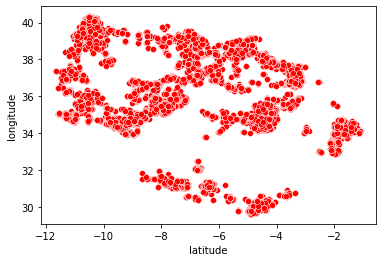

In [6]:
sns.scatterplot(x='latitude', y='longitude', data=df, color='r')

In [11]:
#['#F2722A', '#1E957E', '#2393A2']
fig = px.scatter_mapbox(df_train, lat='latitude', lon='longitude', color='status_group', size='amount_tsh',
                        color_discrete_sequence=['steelblue', '#F2722A', 'cyan'], size_max=25, zoom=4,
                        hover_name='wpt_name', hover_data=['population', 'amount_tsh'], title='Tanzania WaterPumps',
                       labels={'amount_tsh': 'Amount of Water Available ',
                               'population': 'Population ', 'status_group': 'Status '})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [6]:
df

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,NaN,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
18990,NaN,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
28749,NaN,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe


In [1]:
map_pumps = folium.Map(location=[34.938093, -9.856322])

# df.apply(lambda row:folium.CircleMarker(location=[row['latitude'], row['longitude']]).add_to(map_pumps), axis=1)

# map_pumps

NameError: name 'folium' is not defined

In [13]:
def wgs84_to_web_mercator(df, lon, lat):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

df = wgs84_to_web_mercator(df, 'longitude', 'latitude')

In [18]:
x = df['x']
y = df['y']
scale = 2000

x_min = int(x.mean() - (scale * 350))
x_max = int(x.mean() + (scale * 350))
y_min = int(y.mean() - (scale * 350))
y_max = int(y.mean() + (scale * 350))

tile_provider = get_provider(OSM)

plot=figure(
    title='2019 Iraq Conflict Events',
    match_aspect=True,
    tools='wheel_zoom,pan,reset,save',
    x_range=(x_min, x_max),
    y_range=(y_min, y_max),
    x_axis_type='mercator',
    y_axis_type='mercator'
    )

plot.grid.visible = True
map = plot.add_tile(tile_provider)
map.level = 'underlay'

plot.xaxis.visible = False
plot.yaxis.visible = False

output_notebook()

Loading BokehJS ...

In [19]:
def hex_map(plot,df, scale,leg_label='Hexbin Heatmap'):
    r,bins=plot.hexbin(x,y,size=scale*10,hover_color='pink',hover_alpha=0.8,legend_label=leg_label)
    hex_hover = HoverTool(tooltips=[('count','@c')],mode='mouse',point_policy='follow_mouse',renderers=[r])
    hex_hover.renderers.append(r)
    plot.tools.append(hex_hover)

    plot.legend.location = "top_right"
    plot.legend.click_policy="hide"

In [20]:
def bubble_map(plot,df,radius_col,lon,lat,scale,color='orange',leg_label='Bubble Map'):
    radius=[]
    for i in df[radius_col]:
        radius.append(i*scale)
    
    df['radius'] = radius
    
    source = ColumnDataSource(df)
    c=plot.circle(x='x',y='y',color=color,source=source,size=1,fill_alpha=0.4,radius='radius',legend_label=leg_label,hover_color='red')
    
    tip_label='@'+radius_col
    lat_label='@'+lat
    lon_label='@'+lon
    
    circle_hover = HoverTool(tooltips=[(radius_col,tip_label),('Lat:',lat_label),('Lon:',lon_label)],
                             mode='mouse',point_policy='follow_mouse',renderers=[c])
    circle_hover.renderers.append(c)
    plot.tools.append(circle_hover)
    
    plot.legend.location = "top_right"
    plot.legend.click_policy = "hide"

In [21]:
hex_map(plot, df, scale, leg_label='Amount of functional Water Pumps')

# bubble_map(plot, df,  radius_col='gps_height', leg_label='Amount of Water left in Pump',
#           lon='longitude', lat='latitude', scale=scale)

#radius_col='amount_tsh',
show(plot)

In [14]:
df

,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,x,y,radius
id,,,,,,,,,,,,,,,,,,,,,
69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,3.889291e+06,-1.102653e+06,12000000.0
8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3.862649e+06,-2.391108e+05,0.0
34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4.170102e+06,-4.257041e+05,50000.0
67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,4.284260e+06,-1.249723e+06,0.0
19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3.465470e+06,-2.032324e+05,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,NaN,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,4.325059e+06,-7.344160e+05,0.0
18990,NaN,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,4.169097e+06,-5.964745e+05,2000000.0
28749,NaN,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,3.867217e+06,-5.110110e+05,0.0
